In [1]:
!pip install numpy opencv-python matplotlib

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import profile_line

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255  85  93  22   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 113  93 226
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255]


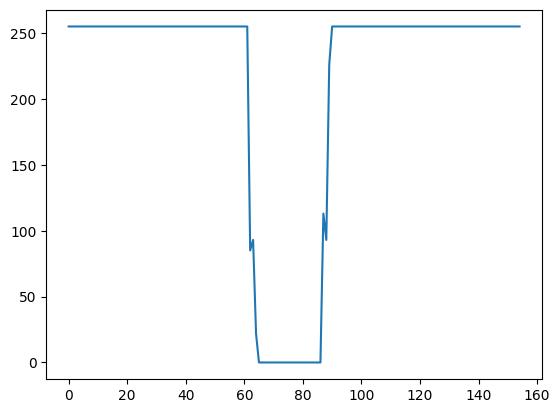

In [3]:
# Read the image file into a matrix with OpenCV
img_mat = cv.imread('wall_1.png', cv.IMREAD_GRAYSCALE)

# First row
print(img_mat[0])
plt.plot(img_mat[0])

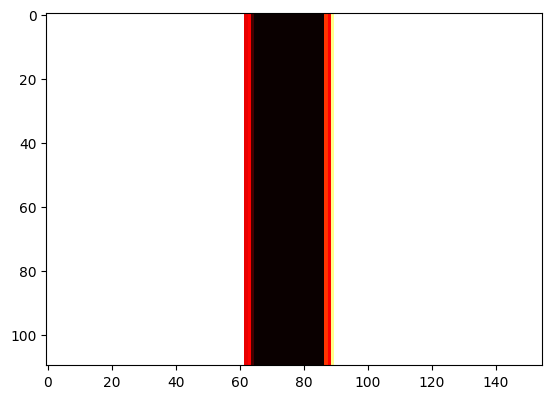

In [4]:
# Plot heatmap
plt.imshow(img_mat, cmap='hot', interpolation='nearest')

In [5]:
# Capture webcam feed and show the frames
#cap = cv.VideoCapture(0)
#
#while True:
#    ret, frame = cap.read()
#
#    # Convert to grayscale
#    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#
#    cv.imshow('Webcam', frame_gray)
#
#    if cv.waitKey(1) == ord('q'):
#        break
#
#cap.release()
#cv.destroyAllWindows()

Try the harder example...

<class 'numpy.ndarray'>
(596, 593)


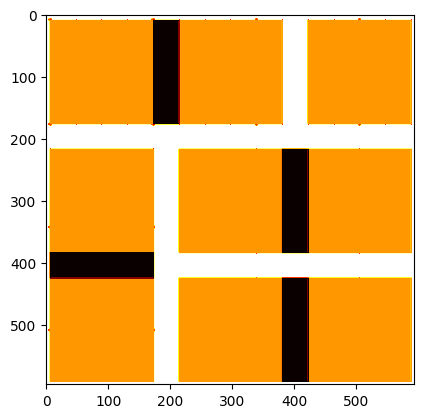

In [6]:
maze_img_mat = cv.imread("maze_test_1.png", cv.IMREAD_GRAYSCALE)
print(type(maze_img_mat))
print(maze_img_mat.shape)

plt.imshow(maze_img_mat, cmap='hot', interpolation='nearest')

In [7]:
# Known issue: this function does not account for wall thickness
def compute_state_midpoints(img_mat, x_num_states, y_num_states):
    img_shape = img_mat.shape
    img_height = img_shape[0]
    img_width = img_shape[1]
    print("height = ", img_height, ", width = ", img_width)

    box_size = (img_width/x_num_states, img_height/y_num_states)
    print(box_size)

    state_mid_points = []
    for j in range(y_num_states):
        for i in range(x_num_states):
            print(i, ",", j)
            mid_point = (i*box_size[0] + box_size[0]/2.0, j*box_size[1] + box_size[1]/2.0)
            print("mid_point =", f'{mid_point[0]:.2f}', f'{mid_point[1]:.2f}')
            state_mid_points.append(mid_point)
    
    return(state_mid_points)


state_mid_points = compute_state_midpoints(maze_img_mat, 3, 3)
print(state_mid_points)

def compute_neighbouring_states(x_num_states, y_num_states):
    neighbouring_states = []
    total_num_states = x_num_states * y_num_states
    print(total_num_states)

    if x_num_states > 2 and y_num_states > 2:
        # top band states
        for i in range(0, x_num_states):
            print(i)
            # top left corner state (state 0)
            if i % x_num_states == 0:
                neighbouring_states.append([1, x_num_states])
            # top right corner state
            elif i % x_num_states == x_num_states-1:
                neighbouring_states.append([2*x_num_states-1, x_num_states-2])
            # top edge states
            else:
                neighbouring_states.append([i+1, i+x_num_states, i-1])

        # mid band states
        for i in range(x_num_states, total_num_states-x_num_states):
            #print(i)
            # left edge states
            if i % x_num_states == 0:
                neighbouring_states.append([i-x_num_states, i+1, i+x_num_states])
            # right edge states
            elif i % x_num_states == x_num_states-1:
                neighbouring_states.append([i-x_num_states, i+x_num_states, i-1])
            # middle states
            else:
                neighbouring_states.append([i-x_num_states, i+1, i+x_num_states, i-1])
        
        # bottom band states
        for i in range(total_num_states-x_num_states, total_num_states):
            print(i)
            # bottom left corner state
            if i % x_num_states == 0:
                neighbouring_states.append([i-x_num_states, i+1])
            # bottom right corner state
            elif i % x_num_states == x_num_states-1:
                neighbouring_states.append([i-x_num_states, i-1])
            # bottom edge states
            else:
                neighbouring_states.append([i-x_num_states, i+1, i-1])

    
    print(neighbouring_states)
    return neighbouring_states

neighbouring_states = compute_neighbouring_states(3, 3)





height =  596 , width =  593
(197.66666666666666, 198.66666666666666)
0 , 0
mid_point = 98.83 99.33
1 , 0
mid_point = 296.50 99.33
2 , 0
mid_point = 494.17 99.33
0 , 1
mid_point = 98.83 298.00
1 , 1
mid_point = 296.50 298.00
2 , 1
mid_point = 494.17 298.00
0 , 2
mid_point = 98.83 496.67
1 , 2
mid_point = 296.50 496.67
2 , 2
mid_point = 494.17 496.67
[(98.83333333333333, 99.33333333333333), (296.5, 99.33333333333333), (494.16666666666663, 99.33333333333333), (98.83333333333333, 298.0), (296.5, 298.0), (494.16666666666663, 298.0), (98.83333333333333, 496.66666666666663), (296.5, 496.66666666666663), (494.16666666666663, 496.66666666666663)]
9
0
1
2
6
7
8
[[1, 3], [2, 4, 0], [5, 1], [0, 4, 6], [1, 5, 7, 3], [2, 8, 4], [3, 7], [4, 8, 6], [5, 7]]


False


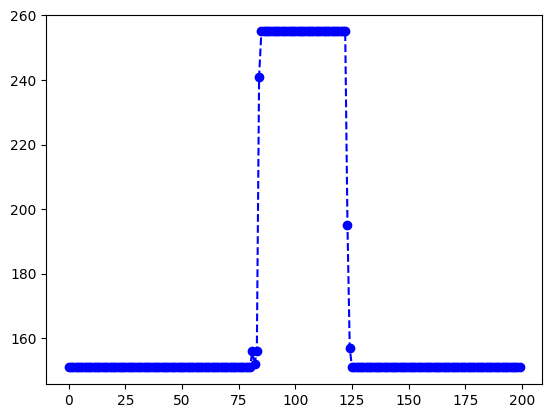

In [8]:
def check_wall_presence(state_a, state_b, state_mid_points, img_mat):
    profile = profile_line(img_mat, state_mid_points[state_a], state_mid_points[state_b], linewidth=1, mode='constant')
    plt.plot(profile, '--bo')

    # A wall is considered present if > x% of grayscale values are less than 10
    num_lt_10 = 0
    num_gt_10 = 0
    for i in range(0, len(profile)):
        # boom!
        if profile[i] < 10:
            num_lt_10 += 1
        else:
            num_gt_10 += 1
    #print("No. values less than 10 = ", num_lt_10)
    #print("No. values greater than 10 = ", num_gt_10)

    fraction_lt_10 = num_lt_10 / len(profile)
    #print(fraction_lt_10)

    if fraction_lt_10 > 0.025:
        return True
    else:
        return False
        

print(check_wall_presence(3, 6, state_mid_points, maze_img_mat))
#check_wall_presence(3, 4, state_mid_points, maze_img_mat)

In [9]:
def generate_maze_environment(img_mat, state_mid_points):
    for state_index, state_mid_point in enumerate(state_mid_points):
        print(state_index)


generate_maze_environment(maze_img_mat, state_mid_points)

0
1
2
3
4
5
6
7
8


(98.83333333333333, 99.33333333333333)
(296.5, 99.33333333333333)
(494.16666666666663, 99.33333333333333)
(98.83333333333333, 298.0)
(296.5, 298.0)
(494.16666666666663, 298.0)
(98.83333333333333, 496.66666666666663)
(296.5, 496.66666666666663)
(494.16666666666663, 496.66666666666663)


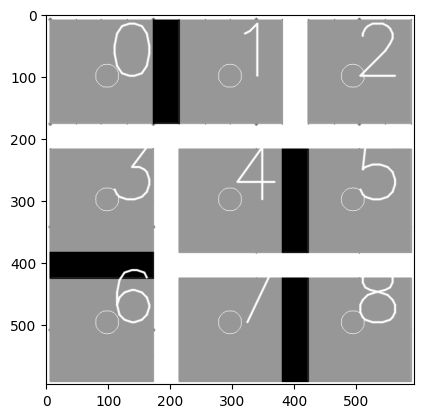

In [ ]:
def draw_state_numbers_on_image(img_mat, x_num_states, y_num_states):
    labelled_image = img_mat.copy()
    for state_index, state_mid_point in enumerate(state_mid_points):
        print(state_mid_point)
        position = (int(state_mid_point[0]), int(state_mid_point[1]))
        radius = int(img_mat.shape[0]/(10*x_num_states))
        thickness = 1
        colour = (255, 0, 0)
        labelled_image = cv.circle(labelled_image, position, radius, colour, thickness)
        font = cv.FONT_HERSHEY_SIMPLEX
        labelled_image = cv.putText(labelled_image, str(state_index), position, font, 1, colour, 2, cv.LINE_AA)
    plt.imshow(cv.cvtColor(labelled_image, cv.COLOR_BGR2RGB))
    plt.show()


draw_state_numbers_on_image(maze_img_mat, 3, 3)